# Bivariate

In summary, the data fields that seems most interesting (and complete) include: db_area. 

glac_stat and anlys_time, also associated with NCSIDC calculations, may also be considered.

elevations, src_date, primeclass, can be checked.

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Check working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Ask pandas to display all columns
pd.set_option('display.max_columns', None)

Current Directory: /Users/yun/Documents/GLIMS/glims_notebooks


In [2]:
# Load Esri shapefiles as geopandas dataframes
points = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_points.shp")
polygons = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_polygons.shp")
#polygons2 = gpd.read_file("GLIMS_20230716/polygons2.csv")

# Load the world countries data from the Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
# Change to datetime
polygons[['anlys_time', 'src_date']] = polygons[['anlys_time', 'src_date']].apply(pd.to_datetime)

# Remove submission-related columns
polygons1 = polygons.drop(labels=[
    'rec_status', 'wgms_id', 'local_id', 
    'subm_id', 'release_dt', 'proc_desc', 
    'rc_id', 'geog_area', 'chief_affl', 
    'loc_unc_x', 'loc_unc_y', 'glob_unc_x', 'glob_unc_y',
    'submitters', 'analysts'
], axis=1)

# Remove non-glacier entities.
polygons2 = polygons1[polygons1.line_type=="glac_bound"]
#polygons2.line_type.value_counts()
polygons2.drop('line_type', axis=1, inplace=True)

/var/folders/13/hf_sfnls1lq6kn8vsc92q40h0000gn/T/ipykernel_43631/2515722808.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polygons2.drop('line_type', axis=1, inplace=True)


Which glaciers have been analyzed more than once?
How many glaciers have been analyzed more than once?

Recall that the GLIMS [Summary Statistics](http://glims.colorado.edu/glacierdata/db_summary_stats.php) page stated 173148 glaciers have multi-temporal coverage. 

The exploratory results here show only 132780. 24% of glaciers have multi-temporal coverage.

In [4]:
# subset recurring glacier ids
idid = polygons2[polygons2.glac_id.duplicated(keep=False)]
idid.glac_id.value_counts()

G302228E64270S    75
G299054E63854S    33
G068799E49603S    29
G008010E46588N    22
G011972E47060N    21
                  ..
G077749E41787N     2
G088904E43601N     2
G073281E38440N     2
G073964E40494N     2
G351869E71120N     2
Name: glac_id, Length: 132780, dtype: int64

In [5]:
# 24%
idid.glac_id.nunique()/polygons2.shape[0]

0.23537879002751227

In [6]:
# focus on one with 2 occurances. 
ididn = idid[idid.glac_id == 'G077749E41787N']
ididn

,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,glac_name,glac_stat,geometry
72218,443886.0,G077749E41787N,2015-07-16,0.954,0.953590,0.0,0.0,0.0,3921.0,0.0,4458.0,2002-08-25,None,exists,"POLYGON Z ((77.74433 41.78619 0.00000, 77.7443..."
402116,586321.0,G077749E41787N,2018-07-01,0.000,0.953582,0.0,0.0,0.0,0.0,0.0,0.0,2002-07-10,None,exists,"POLYGON Z ((77.74838 41.79726 0.00000, 77.7486..."


<Figure size 640x480 with 0 Axes>

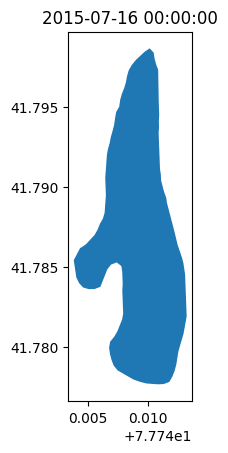

<Figure size 640x480 with 0 Axes>

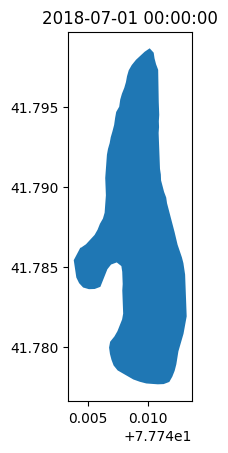

In [7]:
grouped = ididn.groupby('anlys_time');

for group_name, group_data in grouped:
    plt.figure();
    group_data.plot();
    plt.title(f'{group_name}');
    plt.show();

In [8]:
ididvc = idid.glac_id.value_counts()
ididtop = ididvc[ididvc > 70].index.tolist()
ididplot = idid[idid.glac_id.isin(ididtop)]

3

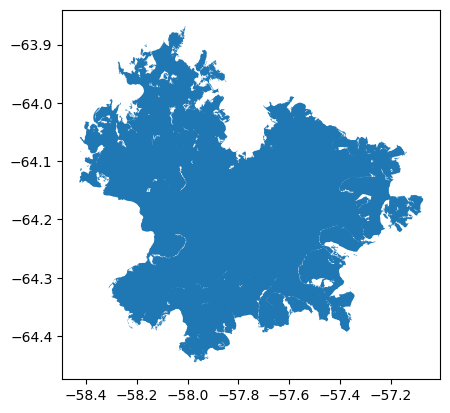

In [9]:
# This glacier has many pieces, but only three analyses
ididplot.plot();
ididplot.anlys_time.nunique()

<Figure size 640x480 with 0 Axes>

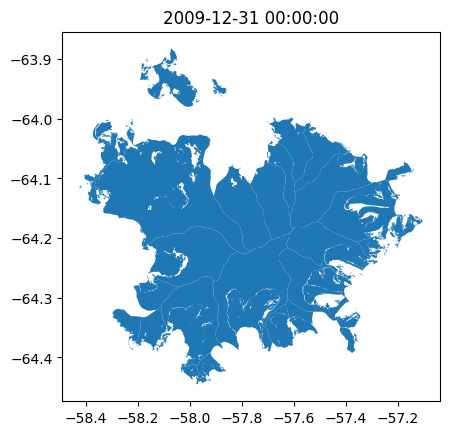

<Figure size 640x480 with 0 Axes>

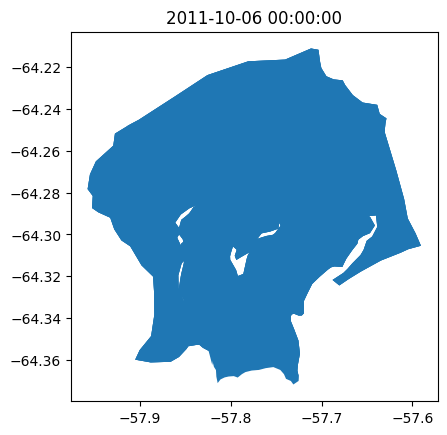

<Figure size 640x480 with 0 Axes>

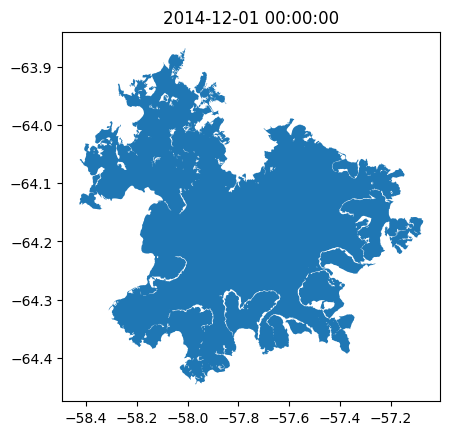

In [10]:
grouped = ididplot.groupby('anlys_time');

for group_name, group_data in grouped:
    plt.figure();
    group_data.plot();
    plt.title(f'{group_name}');
    plt.show();

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


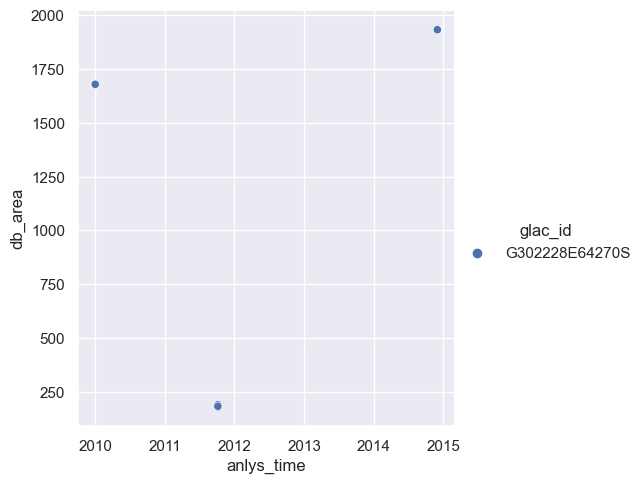

In [11]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=ididplot,
    x="anlys_time", y="db_area",
    hue="glac_id"
);

In [12]:


# Count the number of unique 'anlys_time' per 'glac_id'
grouped = polygons3.groupby('glac_id')['anlys_time'].nunique()

# Subset rows where 'glac_id' has more than one unique 'anlys_time'
multitemp = polygons3[polygons3['glac_id'].isin(grouped[grouped > 1].index)]

# Check if subset was successful
multitemp.shape, polygons3.shape

NameError: name 'polygons3' is not defined

In [ ]:
polygons3.db_area.hist()
multitemp.db_area.hist()

In [ ]:
# Create a figure and an axis object
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Create a box plot for `polygons3.db_area` at position 1
axs[0].boxplot(polygons3.db_area)

# Create a box plot for `multitemp.db_area` at position 2
axs[1].boxplot(multitemp.db_area)

In [ ]:
polygons3.db_area.violinplot()
multitemp.db_area.violinplot()

In [ ]:
plt.plot(multitemp.anlys_time, multitemp.db_area)

In [ ]:
#plt.stackplot(x, y)